# Исследование объявлений о продаже квартир

В нашем распоряжении данные архива объявлений о продаже квартир в Санкт-Петербурге и в соседних населённых пунктах за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. Но прежде нужно исследовать и подготовить данные. Это наша задача.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление:
* [Шаг 1. Откроем файл с данными и изучите общую информацию.](#1)
* [Шаг 2. Предобработка данных.](#2)
* [Шаг 3. Посчитаем и добавим в таблицу.](#3)
* [Шаг 4. Проведём исследовательский анализ данных](#4)
* [Шаг 5. Общий вывод.](#5)

### Шаг 1. Откроем файл с данными и изучите общую информацию. <a class="anchor" id="1"></a>

Импортируем библиотеку pandas:

In [1]:
# <импорт библиотеки pandas>
import pandas as pd

Прочитаем файл, таблицу сохраним в переменную:

In [2]:
# <чтение файла с данными с сохранением в real_estate_data>
original_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate_data = original_data

Получение первых 10 строк таблицы.

In [3]:
# <получение первых 10 строк таблицы.>
pd.set_option('display.max_columns', None)
real_estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



Общая информация о данных таблицы *real_estate_data*.


In [4]:
# <общая информация о данных таблицы real_estate_data>
print(real_estate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца, типы данных у столбцов различаются.

Подробно разберём, какие в *real_estate_data* столбцы и какую информацию они содержат:

* *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
* *balcony* — число балконов
* *ceiling_height* — высота потолков (м)
* *cityCenters_nearest* — расстояние до центра города (м)
* *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
* *first_day_exposition* — дата публикации
* *floor* — этаж
* *floors_total* — всего этажей в доме
* *is_apartment* — апартаменты (булев тип)
* *kitchen_area* — площадь кухни в квадратных метрах (м²)
* *last_price* — цена на момент снятия с публикации
* *living_area* — жилая площадь в квадратных метрах(м²)
* *locality_name* — название населённого пункта
* *open_plan* — свободная планировка (булев тип)
* *parks_around3000* — число парков в радиусе 3 км
* *parks_nearest* — расстояние до ближайшего парка (м)
* *ponds_around3000* — число водоёмов в радиусе 3 км
* *ponds_nearest* — расстояние до ближайшего водоёма (м)
* *rooms* — число комнат
* *studio* — квартира-студия (булев тип)
* *total_area* — площадь квартиры в квадратных метрах (м²)
* *total_images* — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропуски.

### Вывод

Каждая строка таблицы - объявление о продаже квартиры. Проблемы которые видны сразу - пропуски значений в столбцах: *ceiling_height*, *floors_total*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *locality_name*, *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*, *days_exposition*. Множество пропусков вызваны тем что определенные значения при размещении объявления не были указаны пользователями - количество балконов, высота потолка, площадь кухни, всего этажей в доме(возможно заполняется автоматически - но информация есть не для всех домов), жилая площадь, является ли аппартаментами, название населенного пункта. 

Столбцы *airports_nearest*, *cityCenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*, *days_exposition* заполняются автоматически и частично не заполнились из-за ошибки в ПО / недостатка информации.

### Шаг 2. Предобработка данных <a class="anchor" id="2"></a>

Оценим каждый столбец на предмет аномалиий и пропусков. Как нашли - изучаем причину их появления, и если нужно - заменяем.

Начнем с *last_price*:

In [5]:
# <выведем числовое описание данных столбца last_price>
real_estate_data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Все показатели адекватны, но смущает минимальное значение.

In [6]:
# <выведем 5 самых дешевых квартир>
real_estate_data.sort_values(by = 'last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,False,False,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


Квартира стоимостью 12190 проданная за 8 дней и площадью 109 м^2 - это похоже на мошшеничество! Стоит удалить это значение.

In [7]:
# <Удаляем некорректное значение>
real_estate_data = real_estate_data[real_estate_data['last_price'] != 12190]

Осмотрим самые дорогие квартиры на предмет адекватности предоставленных данных:

In [8]:
# <выведем 5 самых дорогих квартир>
real_estate_data.sort_values(by = 'last_price', ascending = False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,NaN,False,False,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,False,False,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0


Комнат много, площадь боярская, к центру близко, цены вполне допустимые.

Оценим столбец *total_area*:

In [9]:
# <выведем числовое описание данных столбца total_area>
real_estate_data['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

Все показатели адекватны.

Оценим столбец *rooms*:

In [10]:
# <выведем числовое описание данных столбца rooms>
real_estate_data['rooms'].describe()

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Меня смутили те квартиры с 0 комнат, я решил проверить нет ли расхождений.

In [11]:
# <выведем числовое описание данных столбца total_area для тех строк где rooms = 0>
real_estate_data[real_estate_data['rooms'] == 0]['total_area'].describe()

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64

In [12]:
# <Все равно посмотрим на самые большие значения>.
(
real_estate_data[(real_estate_data['rooms'] == 0) & (real_estate_data['total_area'] >= 28.4)]
.sort_values(by='total_area',ascending = False)
.head(10)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000.0,371.00,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,False,True,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20082,10,16300000.0,98.40,2017-11-08T00:00:00,0,3.10,5.0,60.50,2,NaN,True,False,NaN,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
3458,6,7400000.0,73.60,2017-05-18T00:00:00,0,NaN,3.0,50.00,1,NaN,True,False,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
21227,0,8200000.0,71.00,2017-07-21T00:00:00,0,5.80,5.0,68.00,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
13613,16,8100000.0,58.40,2019-04-26T00:00:00,0,3.30,7.0,33.00,6,NaN,True,False,NaN,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
10008,20,5050000.0,44.20,2017-09-14T00:00:00,0,2.70,9.0,32.20,1,NaN,True,False,NaN,NaN,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
15319,4,5970000.0,43.30,2017-07-20T00:00:00,0,2.80,9.0,28.20,2,NaN,True,False,NaN,2.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,30.0
7237,8,2999000.0,42.63,2017-11-27T00:00:00,0,NaN,16.0,25.70,2,NaN,False,True,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16130,14,5000000.0,42.10,2018-04-13T00:00:00,0,NaN,20.0,30.00,10,NaN,True,False,NaN,NaN,Санкт-Петербург,50605.0,15933.0,0.0,NaN,0.0,NaN,170.0
9052,12,3890000.0,38.30,2017-10-06T00:00:00,0,2.70,14.0,24.42,7,NaN,True,False,NaN,2.0,Санкт-Петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,289.0


На мой взгляд такие значения вполне допустимы, хоть и смущают. У квартиры с площадью 371 свободная планировка. Часть квартир описаны как студии, тогда можно понять количество комнат. Также есть предположение что пользователь не заполнял ни поле со студией, ни количество комнат, и возможно по какой-то причине в данных есть заглушка = 0, то есть там где данные не указаны стоит 0.

Оценим столбец *ceiling_height*:

In [13]:
# <выведем числовое описание данных столбца ceiling_height>
real_estate_data['ceiling_height'].describe()

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Имеют место быть чересчур низкие высоты потолка и чересчур высокие. Я предположил что если речь идет о квартирах - мы вполне можем быть уверены что существуют определенные правила, рекомендации, очевидные ограничения того, насколько низким может быть потолок. По нормам СНиП (Строительные нормы и правила) это 2,5 метра. Посмотрим насколько адекватны объявления с самыми низкими потолками:

In [14]:
# <выведем 5 самых квартир с самыми низкими потолками>
real_estate_data.sort_values(by = 'ceiling_height').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
11352,4,3300000.0,36.0,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,NaN,False,False,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
19329,5,1700000.0,40.0,2018-07-15T00:00:00,2,2.00,9.0,NaN,8,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Вполне адекватные объявления, за исключением высоты потолка. Заменим значения высоты потолка ниже 2.5 значением 2.5, а также напишем функцию, которая заменяет пропущенные значения медианой. Значения высоты потолка пропущены по причине того что их не заполнил пользователь. А значит у нас достаточно оснований предположить что у пользователя стандартный потолок. Это будет верно и статистически, и с точки зрения бытового опыта.

In [15]:
# <добавим библиотеку numpy для удобной функции замены с условием>
import numpy as np

In [16]:
# <Заменим значения высоты потолка ниже 2.5 значением 2.5,> 
# <ошибка ниже имеет место быть несмотря на то что выражение отработало верно>
real_estate_data['ceiling_height'] = (
np.where((real_estate_data.ceiling_height < 2.5), 2.5, real_estate_data.ceiling_height)
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
# <Напишем функцию подсчитывающую медиану столбца и заполнящую ею пропуски в столбце>
def replacement_by_median(column): 
    column.fillna(column.median(),inplace=True)

In [18]:
# <Заменим пропуски в столбце ceiling_height медианой с помощью функции>
replacement_by_median(real_estate_data['ceiling_height'])

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Осмотрим квартиры с самыми высокими потолками. Они меня очень смущают. Погуглил эту тему - иногда бывают квартиры с 10-метровыми потолками, многоэтажные. Но 100 метров и даже 30 - это что-то невероятное. Выведем диаграмму размаха, чтобы определить, стоит ли избавиться от этих выбросов, так ли их много.

In [19]:
# <импортируем библиотеку matplotlib для построения диаграммы.> 
import matplotlib.pyplot as plt

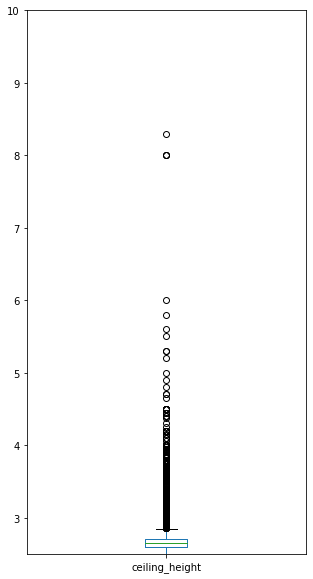

In [20]:
# <выведем диаграмму размаха, сделаем ее достаточно большой чтобы увидеть выбросы.> 
plt.ylim(2.5, 10)
real_estate_data['ceiling_height'].plot.box(figsize=(5,10))
plt.show()

Проверим много ли у нас значений с потолками выше 4 метров.

In [21]:
# <Распечатаем количество строк с потолками выше 4 метров>
print(real_estate_data[real_estate_data['ceiling_height'] > 4]['ceiling_height'].count())

75


Избавимся от этих строк. Это всего 0.3 % данных.

In [22]:
# <импортируем библиотеку для функции isnan>
import math

In [23]:
# <Удаляем некорректные значения, ~(ceiling_height > 4) - это выражение оставляет значения с NaN, сбросим индексы.>
real_estate_data = real_estate_data.query('ceiling_height <= 4 or ~(ceiling_height > 4)')
real_estate_data = real_estate_data.reset_index(drop = True)

Оценим столбец *floors_total*:

In [24]:
# <выведем числовое описание данных столбца floors_total>
real_estate_data['floors_total'].describe()

count    23537.000000
mean        10.684454
std          6.595561
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Есть пропуски в данных. Ничего подозрительного в показателях. Сами пропуски вызваны тем что пользователь не заполнил информацию, посчитав ее избыточной. Для одного из шагов проекта нам будет необходимо знать сколько всего этажей в доме. Пропусков мало, но их здорово было бы заполнить. Предложу пару способов:
* Нейросеть которая будет брать на вход этаж, название насленного пункта и прочее, и затем выдавать нечто правдоподобное, обучаться она будет на заполненных данных.
* Предположить, что чаще всего это будет не первый и не последний этаж, а соотвественно "другой".

В любом случае, мы не будем близки к правде. Оставим эти значения пропущенными, и обработаем их в следующем шаге как "другой".

Оценим столбец *living_area*:

In [25]:
# <выведем числовое описание данных столбца living_area>
real_estate_data['living_area'].describe()

count    21726.000000
mean        34.352313
std         21.651754
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

Все в порядке, займемся пропусками позже, проверим всегда ли *living_area* меньше *total_area*.

In [26]:
# <получим срез где жилая площадь меньше или равна общей площади, и затем подсчитаем кол-во строк>
real_estate_data.query('living_area <= total_area').living_area.count()

21726

Да, противоречий нет. Заполним пропуски в *living_area*:

In [27]:
# <заполним пропущенные значения общей площадью если площадь кухни пропущена, и общая площадь - площадь кухни, если нет.>
for row in real_estate_data.query('living_area.isnull()',engine='python').index:
    if math.isnan(real_estate_data.loc[row, 'kitchen_area']):
        real_estate_data.loc[row, 'living_area'] = real_estate_data.loc[row, 'total_area']
    else:
        real_estate_data.loc[row, 'living_area'] = real_estate_data.loc[row, 'total_area'] - real_estate_data.loc[row, 'kitchen_area']    

Оценим столбец *is_apartment*:

In [28]:
# <выведем числовое описание данных столбца is_apartment>
real_estate_data['is_apartment'].value_counts()

False    2710
True       44
Name: is_apartment, dtype: int64

Думаю будет допустимым заполнить пропуски значением False, так как пользователь не заполнял данное поле скорее всего по причине того что его квартира не является аппартаментами.

In [29]:
# <Заполним пропуски столбца is_apartment значениями False>
real_estate_data['is_apartment'].fillna(False,inplace=True)

In [30]:
# <Изменим тип данных столбца is_apartment на bool, так как он именно такой>
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype('bool')

Оценим столбец *kitchen_area*:

In [31]:
# <выведем числовое описание данных столбца kitchen_area>
real_estate_data['kitchen_area'].describe()

count    21358.000000
mean        10.552558
std          5.869433
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Заполним пропуски в площади кухни в таком же стиле как и в столбце жилой площади. Будут появляться нулевые значения, но это допустимо, учитывая что эти значения не используются для вопросов в 4 шаге.

In [32]:
# <заполним пропущенные значения площади кухни значением = общая площадь - жилая площадь>
for row in real_estate_data.query('kitchen_area.isnull()',engine='python').index:
    real_estate_data.loc[row, 'kitchen_area'] = real_estate_data.loc[row, 'total_area'] - real_estate_data.loc[row, 'living_area']    

Оценим столбец *balcony*:

In [33]:
# <выведем числовое описание данных столбца balcony>
real_estate_data['balcony'].describe()

count    12138.000000
mean         1.149036
std          1.070298
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Заполним пропуски значениями 0, так как если пользователь не заполнил поле, значит балконов нет с большой вероятностью.

In [34]:
# <Заполним пропуски столбца balcony значениями 0>
real_estate_data['balcony'].fillna(0,inplace=True)

In [35]:
# <Изменим тип даннхы столбца balcony на целый, так как балконов не может быть полтора.>
real_estate_data['balcony'] = real_estate_data['balcony'].astype('int')

Рассмотрим столбец *locality_name*. Пропуски в нем могут быть из-за того что пользователь не ввел название населенного пункта, хотя это маловероятно, мало какой сервис объявлений позволит пропустить подобное чисто на уровне интерфейса. Пропуски могли возникнуть в том числе и по причине того что населенный пункт был указан, но не распознан функцией, которая преобразует его в одно из значений справочника, которое затем и сохраняется в строку.( Предполагаем что в справочнике есть дубли)

Выделим типы населенных пунктов в столбце *locality_name* и создадим столбец *loc_name* где будут отражены только названия насленных пунктов:

In [36]:
# <Преобразуем значения в столбце в строковый формат>
real_estate_data['locality_name'] = real_estate_data['locality_name'].astype('str')

# <Выделим типы населенных пунктов>
types = {'город', 'поселок', 'посёлок', 'городского', 'типа', 'городской','коттеджный','станции', 'село','деревня','при','железнодорожной'}

# <Напишем функцию которая сначала разделяет значение на слова, а затем удаляет из него слова из types, и возвращает оставшееся>
def name(text):
    line = set(text.split())
    loc_name = line - types
    return str(loc_name)[2:-2]

# <Создадим столбец loc_name и применим к нему функцию>
real_estate_data['loc_name'] = real_estate_data['locality_name'].apply(name)
real_estate_data.loc[0:10, ['locality_name', 'loc_name']]

,locality_name,loc_name
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,Санкт-Петербург,Санкт-Петербург
5,городской посёлок Янино-1,Янино-1
6,посёлок Парголово,Парголово
7,Санкт-Петербург,Санкт-Петербург
8,посёлок Мурино,Мурино
9,Санкт-Петербург,Санкт-Петербург


В столбце *loc_name* и *locality_name* пропущенные значения теперь отображаются как *nan*, всего их было 49, попробуем убрать их. Для этого, если расстояние до центра, до аэропорта, до парка, до пруда совпадает у одной из строк датасета и строки с *nan* присваиваем этому объявлению этот самый населенный пункт.

In [37]:
def if_nearest_then_that_town(column):
    """
    Функция по очереди обрабатывает каждую строку с nan, и если находит в датасете строку с таким же значением в column,
    как и в нашей строке, заменяет nan на значение из строки датасета.
    """
    for row in real_estate_data.query("loc_name == 'nan'").index:
        i=0
        while real_estate_data.loc[row, 'loc_name'] == 'nan' and i < real_estate_data[real_estate_data[column] >= 0].index.shape[0]:
            for row1 in real_estate_data[real_estate_data[column] >= 0].index:
                if real_estate_data.loc[row, column] == real_estate_data.loc[row1, column]:
                    real_estate_data.loc[row, 'loc_name'] = real_estate_data.loc[row1, 'loc_name']
                i += 1


# <Применим функцию, в качестве аргумента возьмем расстояние от центра>         
if_nearest_then_that_town('cityCenters_nearest')

In [38]:
# <Подсчитаем количество nan>
real_estate_data[real_estate_data['loc_name'] == 'nan']['loc_name'].count()

33

In [39]:
# <Применим функцию, в качестве аргумента возьмем расстояние от аэропорта>
if_nearest_then_that_town('airports_nearest')

In [40]:
# <Подсчитаем количество nan>
real_estate_data[real_estate_data['loc_name'] == 'nan']['loc_name'].count()

24

In [41]:
# <Применим функцию, в качестве аргумента возьмем расстояние от парка>
if_nearest_then_that_town('parks_nearest')

In [42]:
# <Подсчитаем количество nan>
real_estate_data[real_estate_data['loc_name'] == 'nan']['loc_name'].count()

16

In [43]:
# <Применим функцию, в качестве аргумента возьмем расстояние от водоёма>
if_nearest_then_that_town('ponds_nearest')

In [44]:
# <Подсчитаем количество nan>
real_estate_data[real_estate_data['loc_name'] == 'nan']['loc_name'].count()

15

Мы сократили их количество до 15, неплохо, учитывая что их было 49.

Перейдем к столбцу *cityCenters_nearest*, на шаге 4 нам будет необходимо использовать квартиры в центре и в Санкт-Петербурге. Подсчитаем количество пропусков в *cityCenters_nearest*:

In [45]:
# <Подсчитаем количество строк где населенный пункт Санкт-Петербург и расстояние от центра не NaN>
real_estate_data.query('cityCenters_nearest.isnull() and loc_name == "Санкт-Петербург"',engine='python').count()

total_images            61
last_price              61
total_area              61
first_day_exposition    61
rooms                   61
ceiling_height          61
floors_total            60
living_area             61
floor                   61
is_apartment            61
studio                  61
open_plan               61
kitchen_area            61
balcony                 61
locality_name           61
airports_nearest         0
cityCenters_nearest      0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition         25
loc_name                61
dtype: int64

Отчетливо видно, что заполнить их засчет значений прудов, парков, и аэропортов мы не имеем возможности. Количество значений мало, а заполнять медианой - на мой взгляд это некорректно повлияет на исследование зависимости рыночной цены от удаленности от центра. Избавимся от этих строк

In [46]:
real_estate_data = real_estate_data.query('~(cityCenters_nearest.isnull() and loc_name == "Санкт-Петербург")',engine='python')

А вот столько строк вмещает в себя датасет, который мы будем использовать на 4 шаге.

In [47]:
# <Подсчитаем количество строк где населенный пункт Санкт-Петербург и расстояние от центра не NaN>
real_estate_data[(real_estate_data['loc_name'] == 'Санкт-Петербург') & (real_estate_data['cityCenters_nearest'] >= 0)]['cityCenters_nearest'].count()

15634

Остальные пропуски не повлияют на исследование, вроде бы. Пропуски в остальных столбцах некритичны, так как эти столбцы не нужны для исследования.

Изменим тип данных в столбце *first_day_exposition*:

In [48]:
# <Сменим тип данных на тот, где отображаются только год, месяц, день.>
real_estate_data["first_day_exposition"] = real_estate_data["first_day_exposition"].astype("datetime64")

### Вывод

Возможно это перебор. А местами - недобор. Но дальнейшие шаги покажут.

Нами было удалено редкое значение из столбца *last_price*, затем сильно преобразован столбец *ceiling_height*, эти преобразования вполне могут повлиять на дальнейшие выводы, поэтому к ним стоит подходить ответственно. Однако обоснования у меня были я считаю правильные: слишком низкие потолки, логичная замена пропусков, отброс маленького количества аномальных значений. 

В *floors_total* решил оставить пропуски, далее они будут обозначены как *другой* этаж. Это вполне допустимо, учитывая их количество. Я мог заполнить часть пропусков используя функцию которая возьмет расстояние до парков, водоёмов, от центра, но решил что в рамках данной работы это лишнее.

Вполне адекватно заполнил пропуски в *living_area*, используя общую площадь и площадь кухни. Используя жилую площадь были заполнены также пропуски в *kitchen_area*. В столбце *is_apartment* пришли к очевидному выводу - если значения нет, значит *False*. Сменили тип на булевый.

Очевидно заполнили пропуски в *balcony* - если они не заполнены, значит их ноль. Сменили тип на целочисленный.

Обработка *locality_name* была сложной, была написана функция которая используя множества отнимает слова из названий населенных пунктов. Далее был создан столбец *loc_name*, который отображает названия населенных пунктов без их типов (поселок и прочее). В столбце я заметил разные значения, в том числе и ошибочные (с кавычками и перепутанной очередностью слов) - и если бы я их обработал, то пришлось бы менять вручную 30 названий населенных пунктов. я решил что это неэффективно в рамках данной работы, и названия оставил в некорректном виде.

Далее мы подправили *cityCenters_nearest*, который будет важен на 4 шаге. Удалили часть пропусков, та часть пропусков где город != "Санкт-Петербург" нас не интересует.

Изменили тип данных в столбце *first_day_exposition* по причине того что время полночи на данных было бесполезно, а также использование методов .dt требует этого.

В следующий раз хотелось бы исправлять только необходимые пропуски, четче представлять себе какие типы данных необходимо изменить.

Рекомендация к поставщику данных: Использовать справочник для нормализации названий населенных пунктов.

### Шаг 3. Посчитаем и добавим в таблицу <a class="anchor" id="3"></a>

Посчитаем и добавим в таблицу цену квадратного метра в столбец *square_metr_price*:

In [49]:
real_estate_data['square_metr_price'] = real_estate_data['last_price'] / real_estate_data['total_area']

Добавим в таблицу столбцы дня недели, месяца, года:

In [50]:
# <Создадим столбец, отображающий день недели публикации объявления, 0 - понедельник, 6 - воскресенье>
real_estate_data['first_dayofweek'] = real_estate_data['first_day_exposition'].dt.dayofweek

In [51]:
# <Создадим столбец, отображающий месяц публикации объявления>
real_estate_data['first_month'] = real_estate_data['first_day_exposition'].dt.month

In [52]:
# <Создадим столбец, отображающий год публикации объявления>
real_estate_data['first_year'] = real_estate_data['first_day_exposition'].dt.year

Добавим в таблицу столбец *what_floor*:

In [53]:
# <создадим функцию выдающую строки в зависимости от этажа>
def whatfloor(row):
    """
    Возвращает строки 'первый' или 'другой' или 'последний'
    в зависимости от этажа.
    """
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# <создадим столбец what_floor со значениями 'первый','другой' или 'последний'>
real_estate_data['what_floor'] = real_estate_data.apply(whatfloor, axis=1)

Посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [54]:
# <создадим столбец  с соотношением жилой и общей площади, поделив одну на другую>
real_estate_data['living_to_total'] = real_estate_data['living_area'] / real_estate_data['total_area']

In [55]:
# <создадим столбец  с соотношением кухонной и общей площади, поделив одну на другую>
real_estate_data['kitchen_to_total'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']

### Вывод

Были добавлены столбцы стоимости квадратного метра, дня недели, месяца, года публикации объявления, столбец этажа (первый, последний, другой), а также столбцы отношения жилой площади к общей и площади кухни к общей.

Столбы связанные с датой были получены с помощью методов .dt. Столбец этажа с помощью функции с условными операторами.

Остальные столбцы были получены делением одного на другой.

### Шаг 4. Проведём исследовательский анализ данных <a class="anchor" id="4"></a>

* Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

Изучим площадь, столбец *total_area*:

In [56]:
# <выведем числовое описание данных столбца total_area>
real_estate_data['total_area'].describe()

count    23562.000000
mean        60.104089
std         34.866680
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        900.000000
Name: total_area, dtype: float64

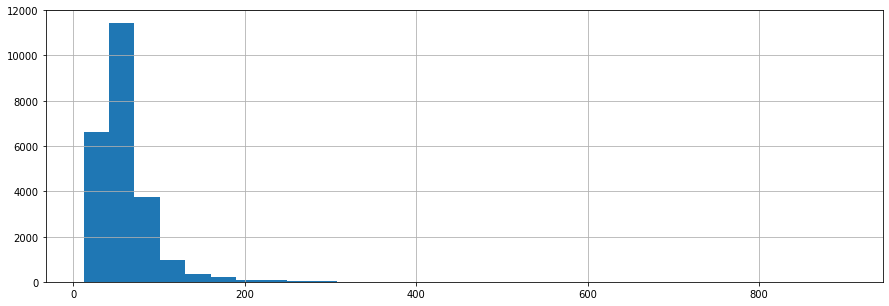

In [57]:
# <выведем гистограмму total_area>
real_estate_data['total_area'].hist(bins=30, figsize = (15,5))

Эта гистограмма больше напоминает распределение Пуассона. Наиболее частые значения в начале оси *x*, квартиры с большой площадью менее частое явление, а потому их частота ближе к нулю. График простирается до более 800 квадратных метров, так как наибольшее значение - 900 квадратных метров.

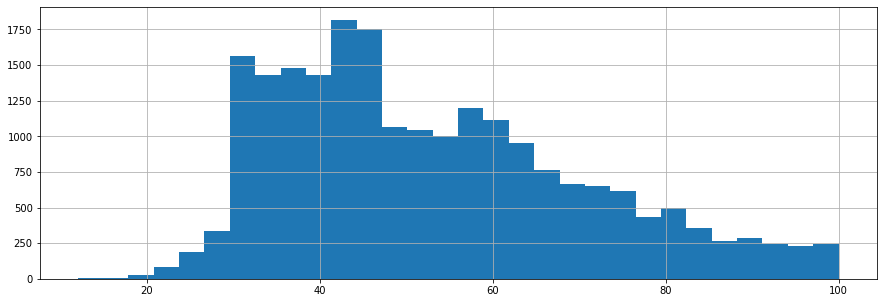

In [61]:
# <выведем гистограмму total_area с ограничением от 12 кв.м. до 100 кв.м.>
real_estate_data['total_area'].hist(bins=30, figsize = (15,5), range=(12,100))

Взяв 75% значений получили нечто похожее на нормальное распеделение. Это ожидаемо для распространенных квартир.

Перейдем к цене, столбец *last_price*:

In [59]:
# <выведем числовое описание данных столбца last_price>
real_estate_data['last_price'].describe()

count    2.356200e+04
mean     6.470459e+06
std      1.067197e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.600003e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

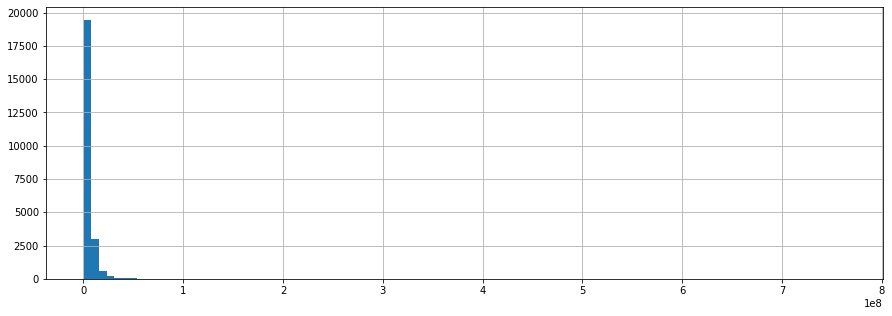

In [60]:
# <выведем гистограмму last_price>
real_estate_data['last_price'].hist(bins=100, figsize = (15,5))

Большинство значений ниже 6.75 млн. рублей, но некотрое множество очень дорогих квартир делают эту гистограмму не очень наглядной.

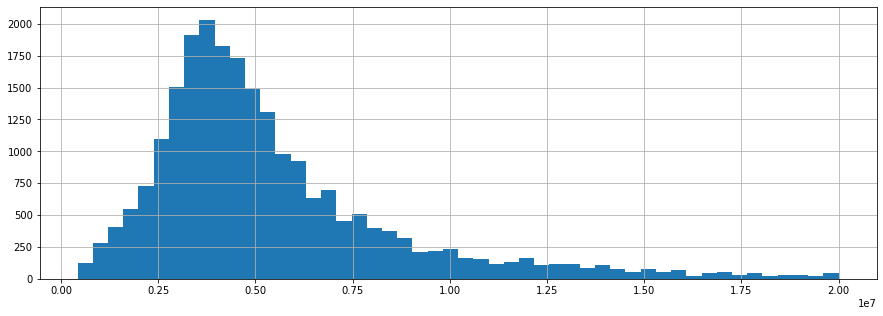

In [61]:
# <выведем гистограмму last_price с ограничением от 4.3 млн. до 20 млн.>
real_estate_data['last_price'].hist(bins=50, figsize = (15,5), range=(4.3e+05,2e+07))

Поставив ограничение от минимальной цены на квартиру до 20 млн. рублей получили вполне правдоподобную картину, большинство квартир в пределах 10 млн. (а точнее 6.75 млн). Далее по пуассоновски элитных квартир все меньше и меньше.

Перейдем к комнатам, столбец *rooms*:

In [62]:
# <выведем числовое описание данных столбца rooms>
real_estate_data['rooms'].describe()

count    23562.000000
mean         2.068033
std          1.074729
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

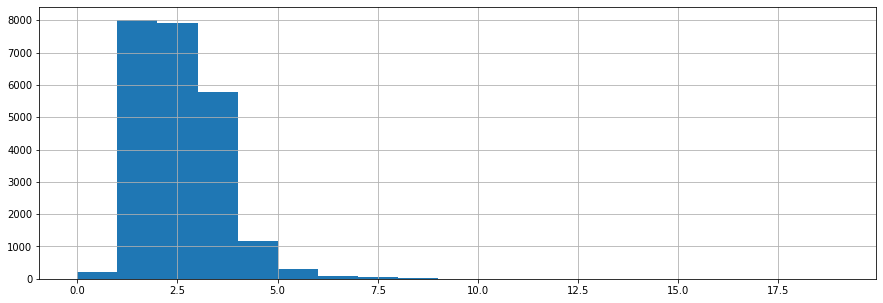

In [63]:
# <выведем гистограмму rooms>
real_estate_data['rooms'].hist(bins=19, figsize = (15,5))

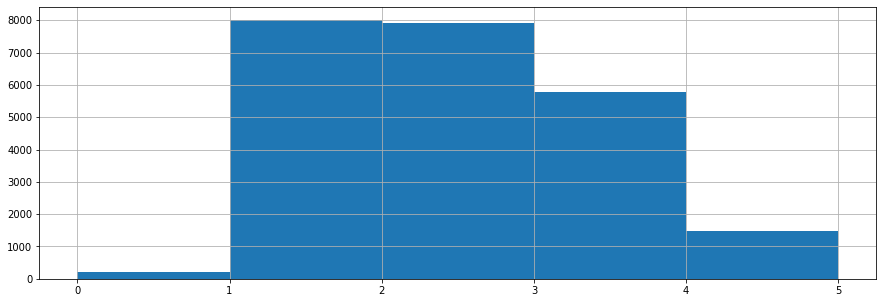

In [64]:
# <выведем гистограмму rooms с ограничением от 0 до 5 комнат>
real_estate_data['rooms'].hist(bins=5, figsize = (15,5), range=(0,5))

Те же самые выводы - Сначала Пуассон, потом нормальное.

Перейдем к высоте потолков, столбец *ceiling_height*:

In [65]:
# <выведем числовое описание данных столбца ceiling_height>
real_estate_data['ceiling_height'].describe()

count    23562.000000
mean         2.693454
std          0.203612
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

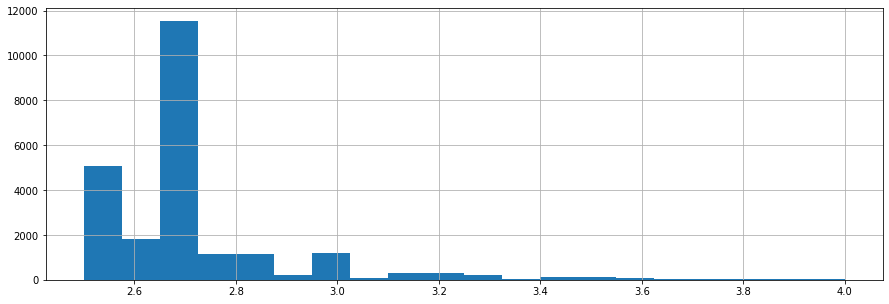

In [66]:
# <выведем гистограмму ceiling_height с ограничением от 2.5 до 4 метров>
real_estate_data['ceiling_height'].hist(bins=20, figsize = (15,5),range=(2.5,4))

На этой гистограмме хорошо видно, что потолки - вещь особенная. Они чаще всего начинаются от 2 с половиной метров и достаточно редко выше 2.7 метров. Исключение - элитные квартиры. Показания с потолками выше 4 метров были мною исключены.

* Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишием, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Выполним задание, используем метод *describe* на столбце *days_exposition*:

In [67]:
# <выведем числовое описание данных столбца days_exposition>
real_estate_data['days_exposition'].describe()

count    20431.000000
mean       180.668151
std        219.503889
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее - 180.668151 дней, Медиана - 95 дней. Построим гистограмму:

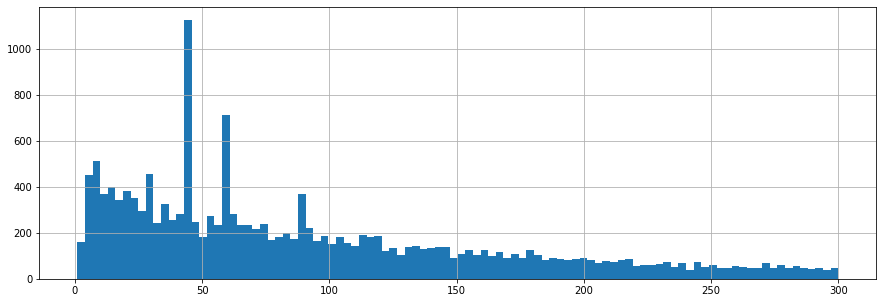

In [68]:
# <выведем гистограмму days_exposition с ограничением от 1 до 300 дней>
real_estate_data['days_exposition'].hist(bins=100, figsize = (15,5),range=(1,300))

Видим 2 выдающихся значения, используем метод *value_counts()*:

In [69]:
# <выведем самые частые значения столбца days_exposition>
print(real_estate_data['days_exposition'].value_counts())

45.0      880
60.0      534
7.0       233
30.0      207
90.0      204
         ... 
951.0       1
693.0       1
1255.0      1
1049.0      1
773.0       1
Name: days_exposition, Length: 1140, dtype: int64


Много значений где срок размещения 45 и 60 дней. Возможно это связано с информацией описанной на этой странице под заголовком **Сроки публикации объявления** https://yandex.ru/support/realty/owner/home/add-ads-housing.html. В среднем продажа занимает от 45 до 231 дня. Я взял 1 и 3 квартиль. Думаю это адекватно взять границы у 50% значений.

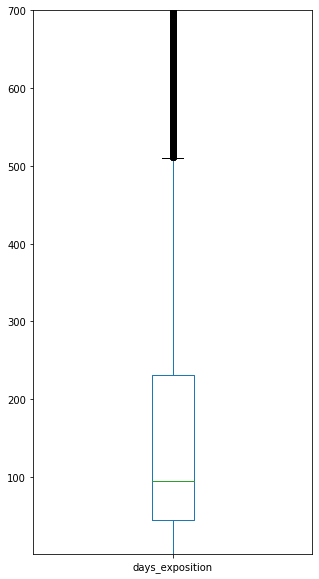

In [70]:
# <выведем диаграмму размаха, сделаем ее достаточно большой чтобы увидеть выбросы.> 
plt.ylim(1, 700)
real_estate_data['days_exposition'].plot.box(figsize=(5,10))
plt.show()

Судя по этой диаграмме размаха, необычно долгими можно считать объявления со сроком размещения более 510 дней. Но со слишком быстрыми не все так просто - если использовать понятие межквартильного размаха - то тут таких выбросов снизу нет. Можно лишь на основе бытового опыта предположить что меньше недели - это быстро.

* Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

Напишем функцию которая будет подсчитывать границу равную 3-ему квартилю + 3 межквартильного размаха (или сколько межквартильных размахов выберет пользователь), отображать сколько процентов датасета будет удалено, а затем удалять часть датасета с выбросами выше границы.

In [71]:
def delete_outliers(column, ranges):
    """
    В аргументе column - столбце датафрейма, ranges - количество межквартильных размахов.
    В переменной border  подсчитаем границу, выше которой будем удалять значения.
    Напечатаем сколько значений будет удалено.
    Затем вернем измененный датафрейм без строк с выбросами.
    """
    border = column.quantile(0.75)+(column.quantile(0.75) - column.quantile(0.25))*ranges
    print(column[column > border].count()/column.count())
    return real_estate_data[column <= border]

In [72]:
# <применим функцию на столбец last_price, выберем 4 размаха чтобы удалить здания дороже примерно 18 млн> 
real_estate_data = delete_outliers(real_estate_data['last_price'], 5)

0.021772345301757066


Допустимо, но многовато.

In [73]:
# <применим функцию на столбец days_exposition, выберем 4 размаха.> 
real_estate_data = delete_outliers(real_estate_data['days_exposition'], 4)

0.015611751209536635


Процент - это отлично.

In [74]:
# <применим функцию на столбец total_area, выберем 4 размаха. Это квартиры с площадью более 110 кв.м.> 
real_estate_data = delete_outliers(real_estate_data['total_area'], 4)

0.0044081880826915285


In [97]:
# <применим функцию на столбец rooms, выберем 4 размаха. Выбросами будем считать те квартиры где более 7 комнат> 
real_estate_data = delete_outliers(real_estate_data['rooms'], 4)
# <сбросим индексы, просто так> 
real_estate_data = real_estate_data.reset_index(drop = True)

0.0


В случае с ценой надо задумываться о бытовом опыте, квартиры ценой 20 миллионов - это реальность. И потому при удалении аномалий стоит выбирать количество межквартильных размахов побольше. Мы выбрали побольше и все равно удалили 2% значений - а это много.

Для срока размещения объявления было выбрано количество межквартильных размахов по той же причине, удалить меньше значений и не забывать о реальности.

С площадью квартир все оказалось веселее - квартир где площадь больше огромной трехкомнатной(100 кв.м) не так много.

С комнатами я умудрился вообще не удалить значений, и считаю что это нормально.

Остальные столбцы на мой взгляд, не нуждаются в обработке.

Главная особенность, которая была обнаружена - если мы хотим удалить выбросы, 1.5 межквартильных размаха не всегда подойдут. Датасет датасету рознь.

* Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Построим матрицу рассеяния для 4 величин - цена на момент снятия с публикации, стоимость квадратного метра, комнаты, расстояние от центра:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eee4cd990>,
      dtype=object)

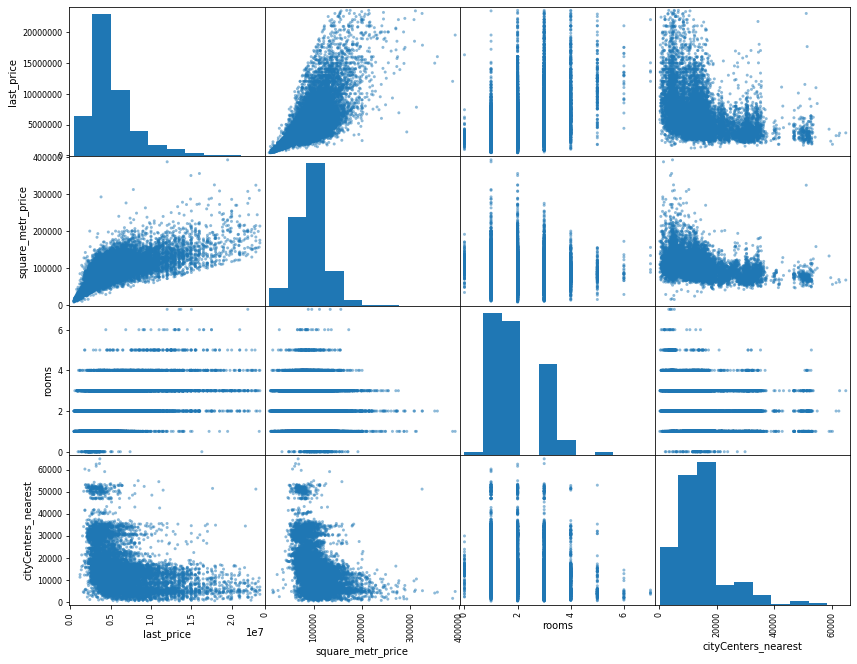

In [76]:
# <Используем метод scatter_matrix и укажем столбцы>
pd.plotting.scatter_matrix(real_estate_data.loc[:, ['last_price', 'square_metr_price','rooms','cityCenters_nearest']], figsize=(14, 11))

In [77]:
# <вызовем метод corr() для подсчета связи между столбцами>
print(real_estate_data.loc[:, ['last_price', 'square_metr_price','rooms','cityCenters_nearest']].corr())

                     last_price  square_metr_price     rooms  \
last_price             1.000000           0.652581  0.494493   
square_metr_price      0.652581           1.000000 -0.119650   
rooms                  0.494493          -0.119650  1.000000   
cityCenters_nearest   -0.356065          -0.395251 -0.141532   

                     cityCenters_nearest  
last_price                     -0.356065  
square_metr_price              -0.395251  
rooms                          -0.141532  
cityCenters_nearest             1.000000  


Судя по 2 графику 1 строки, стоимость квартиры коррелирует со стоимостью квадратного метра пока квадратный метр не начинает стоить 200000. Судя по корреляции 0.65, имеется положительная линейная связь.

Судя по 3 графику 1 строки, чем ближе количество комнат к среднему, тем в большем количестве цен представлена квартира. Я проверил что большая часть квартир с 3 комнатами дешевле 5 млн. не находятся в Санкт-Петербурге. Судя по корреляции 0.49, имеется положительная линейная связь.

Судя по 4 графику 1 строки, чем ниже удаленность от центра, тем выше цена. В пределах 20 км представлены практически все цены, после них цены часто не превышают 5 млн. рублей. Судя по корреляции -0.36, имеется отрицательная линейная связь.

Построим матрицу рассеяния для 4 величин - цена квартиры, день недели публикации, месяц, год:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eee0e81d0>,
      dtype=object)

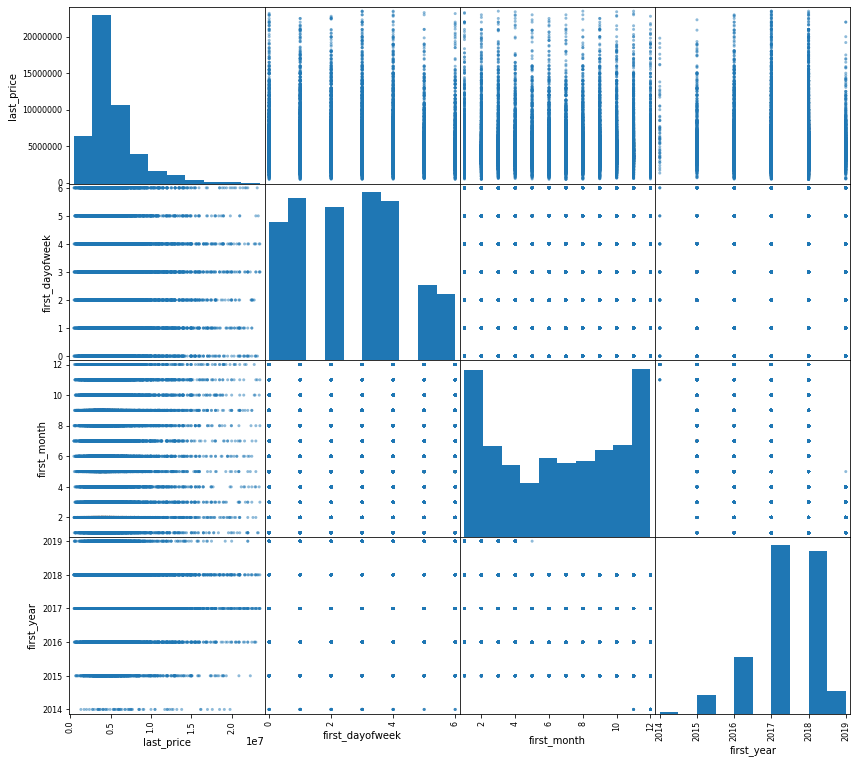

In [78]:
# <Используем метод scatter_matrix и укажем столбцы>
pd.plotting.scatter_matrix(real_estate_data.loc[:, ['last_price','first_dayofweek','first_month','first_year']], figsize=(14, 13))

In [79]:
# <вызовем метод corr() для подсчета связи между столбцами>
print(real_estate_data.loc[:, ['last_price','first_dayofweek','first_month','first_year']].corr())

                 last_price  first_dayofweek  first_month  first_year
last_price         1.000000        -0.012434     0.004101   -0.043883
first_dayofweek   -0.012434         1.000000     0.008835    0.001219
first_month        0.004101         0.008835     1.000000   -0.204791
first_year        -0.043883         0.001219    -0.204791    1.000000


Судя по 2 графику 1 строки, квартиры с большой стоимостью чаще бывают проданы если выставлены в понедельние или в четверг. Судя по корреляции -0.12, имеется отрицательная линейная связь. Что значит - чем более поздний день недели тем меньше данных. Но эта корреляция близка к нулю, что означает что связь мала.

Судя по 3 графику 1 строки, все квартиры ценой ниже 11-12 миллионов одинаково продаются во все месяцы. Рекордсмены  - последние 3 месяца года и февраль. Судя по корреляции 0.004, имеется крайне малая положительная линейная связь.

Строить предположения по 4 графику 1 строки скорее всего некорректно. Сам сервис хоть и запущен в 2010, становится популярнее с каждым годом, а потому и объявлений больше. А количество объявлений в 2019 скорее всего просто меньше чем объявлений 2018-го, так как данные которые были нам предоставлены имеются возможно не по всему 2019 году(не проверял). Судя по корреляции -0.04, имеется крайне малая отрицательная линейная связь.

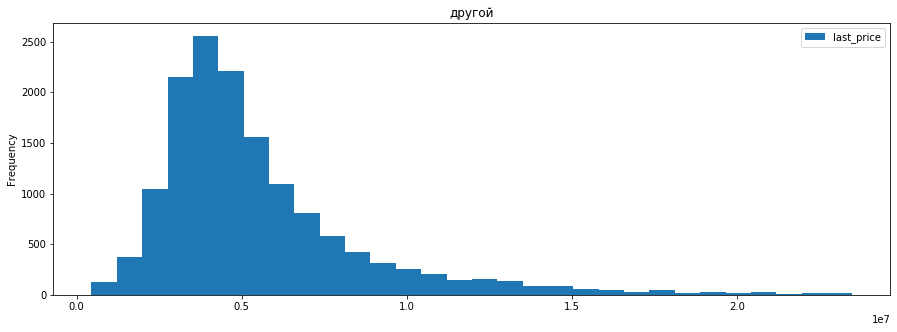

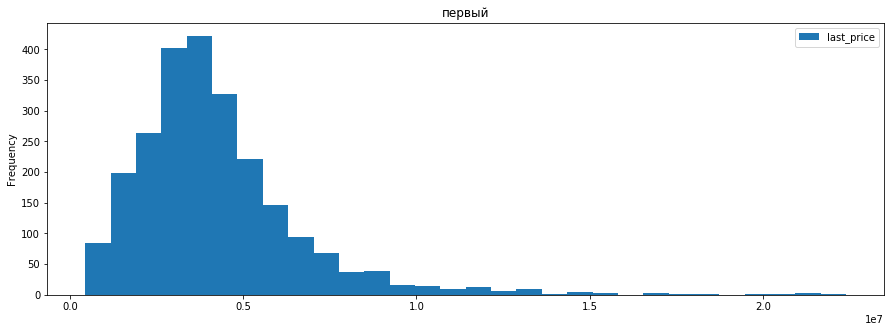

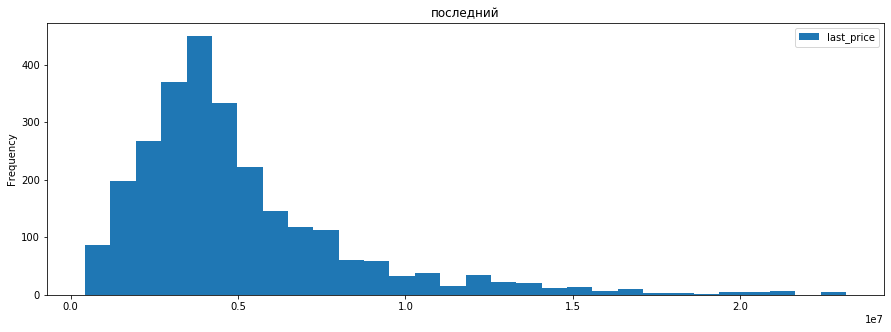

In [80]:
# <Создадаим таблицу со столбцами цены и категории этажа>
df = real_estate_data.loc[:, ['last_price','what_floor']]

# <Построим три гистограммы чтобы рассмотреть зависимость цены от категории этажа>
for name,group_data in df.groupby('what_floor'):
    group_data.plot(kind='hist', y = 'last_price', bins=30, title=name, figsize = (15,5))

Квартир, стоящих от 15 до 20 миллионов больше на последних этажах чем на первых. Это ожидаемо - квартиры на верхних этажах всегда были дороже. Больше всего квартир находятся на одном отрезке цен, и это характерно для всех этажей. В остальном гистограммы очень похожи.

* Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

Создадим сводную таблицу для выполнения задания:

In [81]:
# <Построим таблицу где сгруппируем среднюю цену квадратного метра по населенным пунктам>
real_estate_data_pivot = (
real_estate_data
.pivot_table(index = ['loc_name'], values = 'square_metr_price', aggfunc = ['count','mean'])
)

# <Переименуем строки чтобы была возможность к ним обращаться>
real_estate_data_pivot.columns = ['count', 'mean_square_metr_price']

# <Отсортируем по количеству объявлений>
real_estate_data_pivot.sort_values(by = 'count', ascending = False, inplace = True)

# <Выведем 10 населённых пунктов с наибольшим числом объявлений>
real_estate_data_pivot.head(10)

,count,mean_square_metr_price
loc_name,,
Санкт-Петербург,12930,107575.987391
Мурино,541,85830.117146
Кудрово,434,94388.401697
Шушары,404,77937.129103
Всеволожск,332,66863.622693
Колпино,304,74680.412887
Парголово,300,89591.387314
Пушкин,291,100809.431181
Гатчина,263,68106.084145


Покажем населённые пункты с самой высокой и низкой стоимостью жилья.

In [82]:
# <Отсортируем по цене за кв.м.>
real_estate_data_pivot.sort_values(by = 'mean_square_metr_price', ascending = False, inplace = True)

# <Выведем 10 населённых пунктов с наибольшей ценой за кв.м.>
real_estate_data_pivot.head(10)

,count,mean_square_metr_price
loc_name,,
Зеленогорск,20,114233.775593
"Нос', 'Лисий",2,113728.348730
Санкт-Петербург,12930,107575.987391
Сестрорецк,159,101888.764773
Пушкин,291,100809.431181
Левашово,1,96997.690531
Мистолово,9,96157.152893
Кудрово,434,94388.401697
Парголово,300,89591.387314


In [83]:
# <Отсортируем по цене за кв.м.>
real_estate_data_pivot.sort_values(by = 'mean_square_metr_price', ascending = True, inplace = True)

# <Выведем 10 населённых пунктов с наименьшей ценой за кв.м.>
real_estate_data_pivot.head(10)

,count,mean_square_metr_price
loc_name,,
Старополье,3,11206.221198
Свирь,2,11481.481481
"Вахнова', 'Кара",1,11688.311688
Выскатка,2,12335.480902
Совхозный,2,12629.129129
"Малая', 'Романовка",1,12724.550898
Тёсово-4,1,12931.034483
Бор,1,13157.894737
Ям-Тесово,2,13711.553373


* Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Создадим столбец, отображающий количество километров до центра:

In [84]:
# <поделим столбец cityCenters_nearest на 1000 и округлим>
real_estate_data['cityCenters_km'] = (real_estate_data['cityCenters_nearest']/1000).round()

Создадим сводную таблицу. Сгруппируем цены на квартиры по километрам от центра и посчитаем среднее для каждого километра.

In [85]:
# <Построим таблицу где сгруппируем среднюю цену квадратного метра по населенным пунктам>
data_km_last_price = (
real_estate_data
.pivot_table(index = ['cityCenters_km'], values = 'last_price', aggfunc = 'mean')
)

# <Переименуем столбец>
data_km_last_price.columns = ['km_mean_price']

# <Выведем 10 первых километров от центра и  среднюю цену для них>
data_km_last_price.head(10)

,km_mean_price
cityCenters_km,
0.0,9.625455e+06
1.0,1.032238e+07
2.0,9.871268e+06
3.0,8.503510e+06
4.0,9.156927e+06
5.0,9.347300e+06
6.0,8.412525e+06
7.0,8.058952e+06
8.0,7.852746e+06


Построим график сводной таблицы.

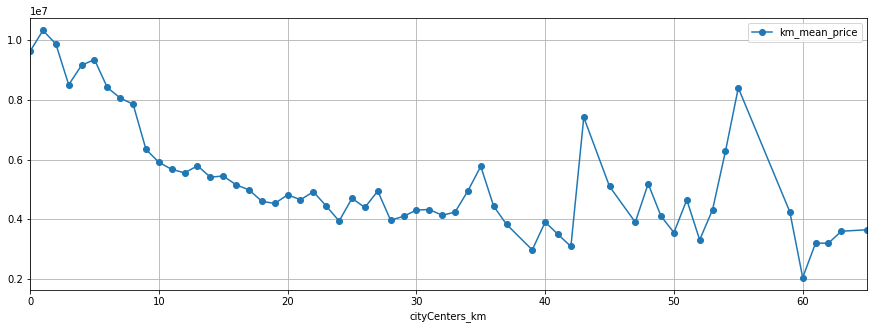

In [86]:
# <построим график-линию для сводной таблицы>
data_km_last_price.plot(kind='line', figsize = (15,5), style = 'o-', grid = True)

Код ниже я запускал несколько раз, и мое личное мнение - центральная зона в радиусе 10 км от центра. Если выбирать радиус выше, разница средних равна около 2 млн. между 10 и 20 км радиуса. Ниже разница около 3 млн рублей. Это примерно совпадает с моим представлением о центре в Санкт-Петербурге. Имеется "Центральный район" и районы его окружающие, и все это умещается примерно в радиусе 10 км.

In [87]:
# <Взят срез данных с расстоянием от центра более 10 км и подсчитана средняя цена квартиры для этих данных>
real_estate_data[real_estate_data['cityCenters_km'] > 10]['last_price'].mean()

5193995.375431582

In [88]:
# <Взят срез данных с расстоянием от центра менее 10 км и подсчитана средняя цена квартиры для этих данных>
real_estate_data[real_estate_data['cityCenters_km'] <= 10]['last_price'].mean()

8072535.860533399

* Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Создадим срез данных, где будут только объявления квартир из центра:

In [89]:
# <Добавим в переменную срез данных с расстоянием от центра менее или ровно 10 км>
centers_data = real_estate_data[real_estate_data['cityCenters_km'] <= 10]

In [90]:
# <выведем числовое описание площади, цены, числа комнат, высоты потолков для обоих срезов>
print(centers_data['total_area'].describe())
print(real_estate_data['total_area'].describe())
print(centers_data['last_price'].describe())
print(real_estate_data['last_price'].describe())
print(centers_data['rooms'].describe())
print(real_estate_data['rooms'].describe())
print(centers_data['ceiling_height'].describe())
print(real_estate_data['ceiling_height'].describe())

count    4087.000000
mean       68.154074
std        29.204711
min        12.000000
25%        45.100000
50%        62.200000
75%        85.000000
max       173.200000
Name: total_area, dtype: float64
count    19649.000000
mean        55.283527
std         22.439773
min         12.000000
25%         39.000000
50%         50.000000
75%         65.600000
max        173.200000
Name: total_area, dtype: float64
count    4.087000e+03
mean     8.072536e+06
std      4.100234e+06
min      1.600000e+06
25%      5.000000e+06
50%      7.000000e+06
75%      9.990000e+06
max      2.350000e+07
Name: last_price, dtype: float64
count    1.964900e+04
mean     5.279765e+06
std      3.153446e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.470000e+06
75%      6.250000e+06
max      2.350000e+07
Name: last_price, dtype: float64
count    4087.000000
mean        2.324199
std         1.075177
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name

*total_area*: Видно что медиана выше на 12, а среднее выше на 13. В среднем площадь квартир в центре больше. Также самая большая квартира находится в центре.

*last_price*: Медиана выше на 2.5 миллиона, а среднее на 2.8. Выше минимальная цена на квартиру, самая дорогая квартира находится в центре.

*rooms*: В среднем в центре 3 комнаты в отличие от 2-ух в остальном городе. Квартира с самым большим количеством комнат находится не в центре. Может это из-за тесноты?

*ceiling_height*: 3 квартиль выше на 30 см, а среднее на 13 см. Да потолки в центре определенно выше. Были бы еще выше, если бы мы не избавились от выбросов.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ee7d48050>,
      dtype=object)

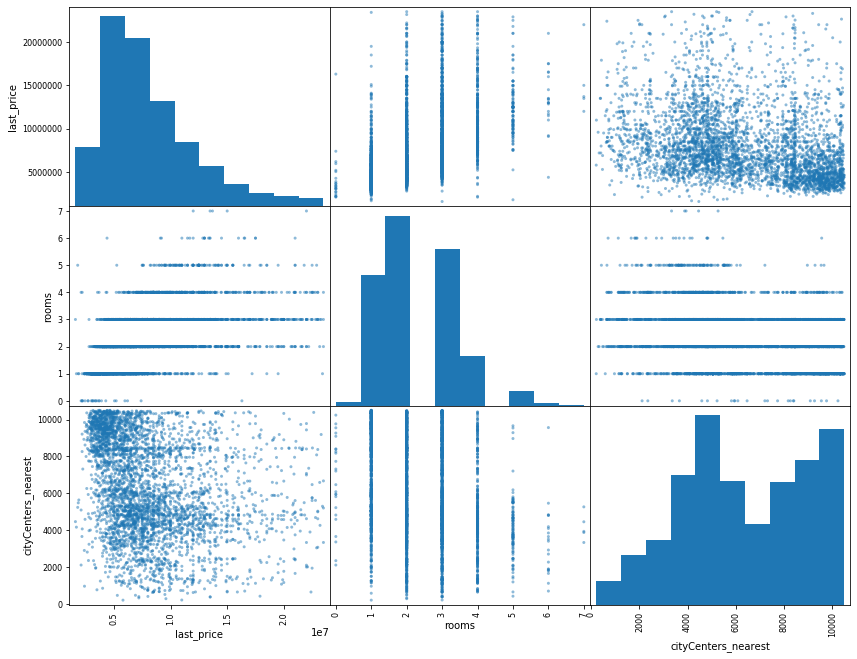

In [91]:
# <Используем метод scatter_matrix и укажем столбцы>
pd.plotting.scatter_matrix(centers_data.loc[:, ['last_price', 'rooms','cityCenters_nearest']], figsize=(14, 11))

In [92]:
# <вызовем метод corr() для подсчета связи между столбцами>
print(centers_data.loc[:, ['last_price', 'rooms','cityCenters_nearest']].corr())

                     last_price     rooms  cityCenters_nearest
last_price             1.000000  0.510931            -0.304693
rooms                  0.510931  1.000000            -0.288548
cityCenters_nearest   -0.304693 -0.288548             1.000000


Судя по 2 графику 1 строки, чем ближе количество комнат к среднему, тем в большем количестве цен представлена квартира. Мне тяжело понять почему 3-4х-комнатные квартиры стоят в пределах 10 млн. в центре. Судя по корреляции 0.51, имеется положительная линейная связь. Чем больше комнат, тем дороже.

Судя по 3 графику 1 строки, количество квартир стоимостью ниже 10 млн. увеличивается чем далье мы от центра. Что в целом ожидаемо - чем дальше от центра, тем больше места для квартир и сами они должны быть дешевле. В отличие от данных по всему городу - там чем дальше от центра, тем количество квартир меньше.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ee79e5190>,
      dtype=object)

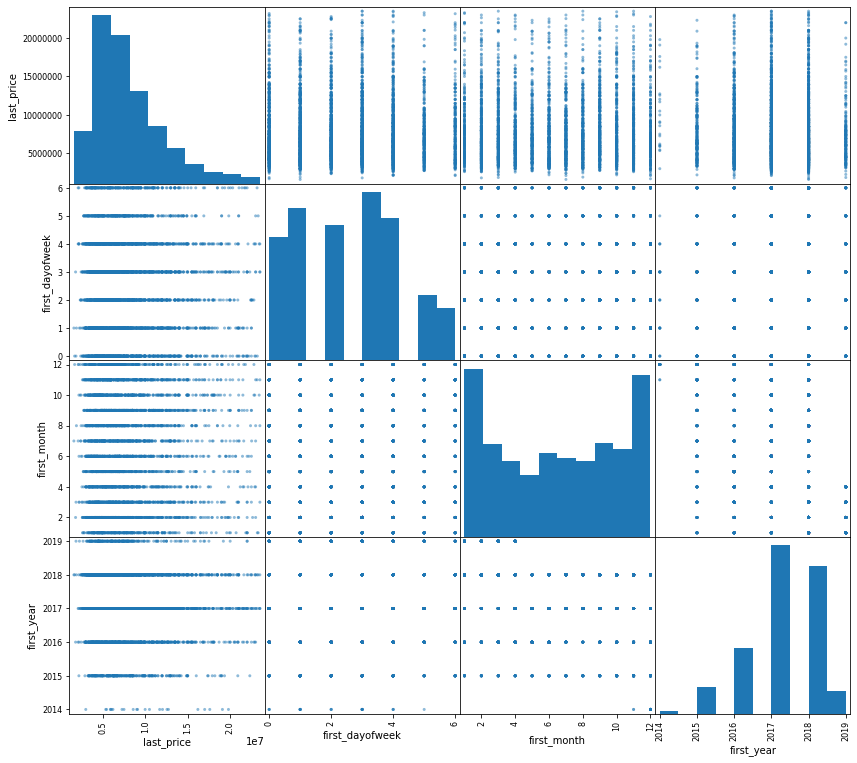

In [93]:
# <Используем метод scatter_matrix и укажем столбцы>
pd.plotting.scatter_matrix(centers_data.loc[:, ['last_price','first_dayofweek','first_month','first_year']], figsize=(14, 13))

In [94]:
# <вызовем метод corr() для подсчета связи между столбцами>
print(centers_data.loc[:, ['last_price','first_dayofweek','first_month','first_year']].corr())

                 last_price  first_dayofweek  first_month  first_year
last_price         1.000000        -0.016024     0.009892   -0.052588
first_dayofweek   -0.016024         1.000000     0.022611    0.009552
first_month        0.009892         0.022611     1.000000   -0.214173
first_year        -0.052588         0.009552    -0.214173    1.000000


Судя по 2 графику 1 строки, квартиры с большой стоимостью чаще бывают проданы если выставлены не в выходные. Также в среду количество выставленных дорогих квартир меньше. Ситуация с выходными совпадает с таковой на полном срезе.

Судя по 3 графику 1 строки, я выделю апрель, май, август. Тут меньше дорогих квартир, и это может быть связано с тем продавать квартиру перед майскими, перед летом, и перед отправлением ребенка в школу - это то, что делают реже. Ситуация совпадает с таковой на полном срезе.

Строить предположения по 4 графику 1 строки скорее всего некорректно. Сам сервис хоть и запущен в 2010, становится популярнее с каждым годом, а потому и объявлений больше. А количество объявлений в 2019 скорее всего просто меньше чем объявлений 2018-го, так как данные которые были нам предоставлены имеются возможно не по всему 2019 году(не проверял).

Корреляции крайне малы.

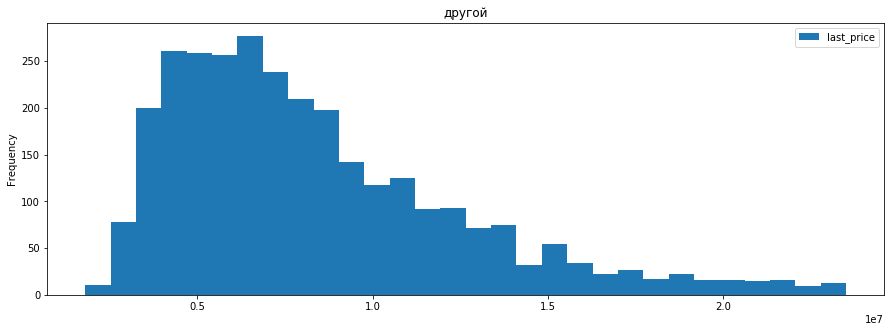

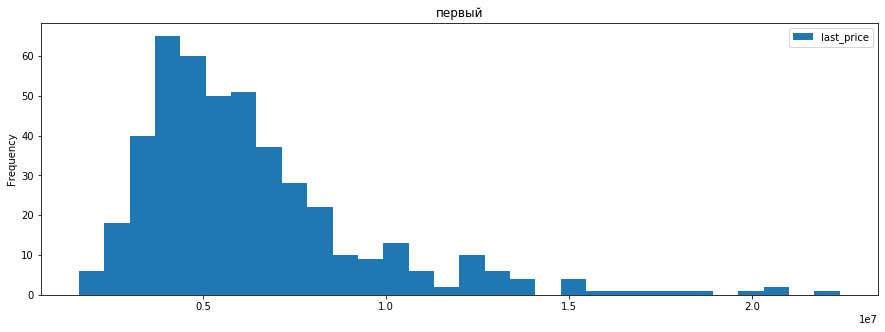

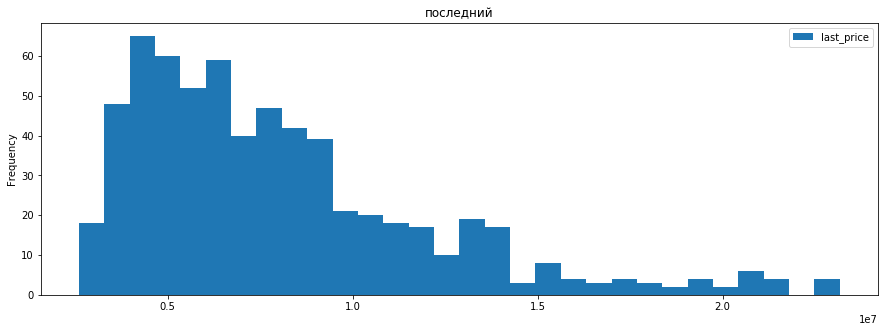

In [95]:
# <Создадаим таблицу со столбцами цены и категории этажа>
df = centers_data.loc[:, ['last_price','what_floor']]

# <Построим три гистограммы чтобы рассмотреть зависимость цены от категории этажа>
for name,group_data in df.groupby('what_floor'):
    group_data.plot(kind='hist', y = 'last_price', bins=30, title=name, figsize = (15,5))

Квартир, стоящих от 15 до 20 миллионов больше на последних этажах чем на первых. Это ожидаемо - квартиры на верхних этажах всегда были дороже. Больше всего квартир находятся на одном отрезке цен, и это характерно для всех этажей. В остальном гистограммы очень похожи. И близки к тому, что мы видим на общем срезе данных

### Вывод

* Для 1 вопроса были построены гистограммы и изучены данные. Чтобы гистограмма была наглядной, приходилось ограничивать ширину оси.

* Во 2 вопросе считаю все было выполнено.

* В 3 вопросе использовали понятие межквартильного размаха и выкинули немалую часть данных используя функцию, далее это неслабо повлияло на наши выводы.

* В 4 вопросе было сделано немало выводов, очевидных и не очень.

* В 5 вопросе все было довольно просто - сводная таблица, затем сортируем и выводим.

* 6 вопрос был легко решен. Считаю что выбранный мною радиус центра вполне обоснован.

* 7 вопрос - повторение 4 вопроса для центра. Большинство выводов совпало. В целом в центре дороже жилье. А также больше кв.м., но ненамного.

### Шаг 5. Общий вывод <a class="anchor" id="5"></a>

Мои мысли:

* Немало столбцов, которые должны были быть заполнены автоматически на сервисе, имели пропуски. Например количество ближайших водоемов, и сколько до него метров. И еще несколько подобных столбцов.


* Поставщику данных стоит заполнять определенные незаполненные значения, например количество балконов, количество этажей(если это возможно), "являются ли аппартаментами". Поставить проверку на сайте, чтобы не проходили крайне низкие значения потолка.


* Квартиры в Санкт-Петербурге, проданные за бесценок, да еще и быстро - это возможно, мошенничество. Но чтобы это определить, необходимо знать по каким еще признакам распознают мошенничество в продаже недвижимости.


* Квартиры с 0 комнат - являются ли все они студиями. Я так и не уверен. Чересчур высокие потолки - природа этих значений неясна.


* В целом засчет исследования многие очевидные бытовые знания были подтверждены - например, цена и площадь зависят от того насколько ты близок к центру города.  Но были и новые - например меньшее количество объявлений с дорогими квартирами по выходным. Также удивили недорогие квартиры в центре. Возможно это мошшеничество.


* Считаю что в этом проекте набил руку в плане предобработки, визуализации. Все еще тяжело с автоматизацией, не всегда понятно что стоит автоматизировать, а что нет.